In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score


%matplotlib inline
# %pylab inline

In [67]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

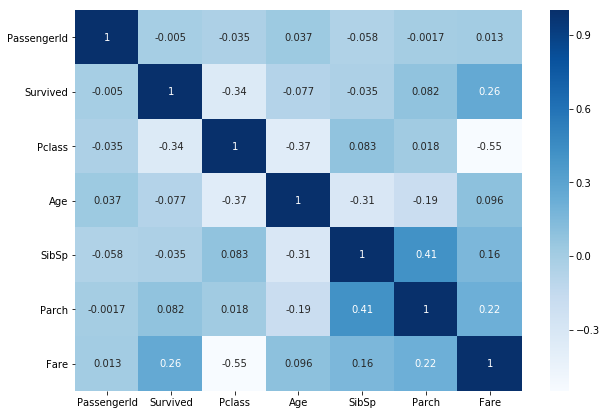

In [39]:
plt.figure(figsize=(10,7))
sns.heatmap(train.corr(), annot=True, cmap="Blues")

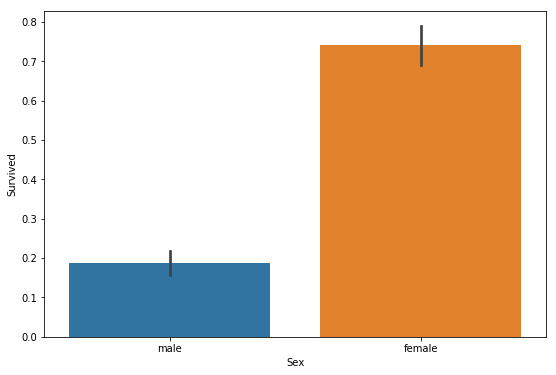

In [40]:
plt.figure(figsize=(9,6))
sns.barplot(x='Sex', y='Survived', data= train)

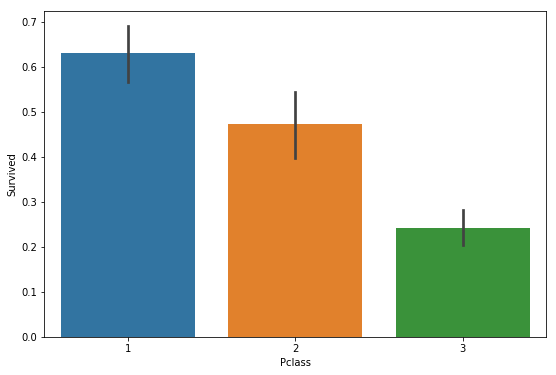

In [41]:
plt.figure(figsize=(9,6))
sns.barplot(x='Pclass', y='Survived', data=train)

In [68]:
train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [69]:
train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C


In [70]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [71]:
def transf(valor):
        if valor == 'female':
            return 1
        else:
            return 0

train['Sex'] = train['Sex'].map(transf)
test['Sex'] = test['Sex'].map(transf)

In [72]:
media = np.int(train['Age'].median())
train['Age'] = train['Age'].fillna(media)
test['Age'] = test['Age'].fillna(media)

In [73]:
train['Embarked'] = train['Embarked'].replace({'S':0, 'C':1, 'Q':2})
train['Embarked'] = train['Embarked'].fillna(-1)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [19]:
train['Ticket'] = train['Ticket'].str.replace(r'\D', '')
train['Ticket'] = pd.to_numeric(train['Ticket'])

test['Ticket'] = test['Ticket'].str.replace(r'\D', '')
test['Ticket'] = pd.to_numeric(test['Ticket'])

In [15]:
vari = ['Pclass', 'Fare']
x = train[vari]
y = train['Survived']
x = x.fillna(-1)
y = y.fillna(-1)

In [16]:
lista = train['Ticket']

contador = Counter(lista)

repetidos = [
    item for item, quantidade in contador.items() 
        if quantidade > 1
]

quantidade_repetidos = len(repetidos)

print(f'Há {quantidade_repetidos} números repetidos na lista')

Há 134 números repetidos na lista


In [75]:
# # alterando quantidade de filhos
# idx = train[train['Age'] < 15].index
# train['Parch'][idx] = 0
# test['Parch'][idx] = 0

In [23]:
df1 = train.set_index('Ticket')
d = df1[['Survived', 'Pclass', 'SibSp', 'Parch', 'Sex','Age', 'Name']].loc[repetidos]
d = d.rename(columns = {'SibSp':'Numero irmaos', 'Parch': 'Filhos a bordo'})
d.loc[347742.0]

,Survived,Pclass,Numero irmaos,Filhos a bordo,Sex,Age,Name
Ticket,,,,,,,
347742.0,1,3,0,2,1,27.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
347742.0,1,3,1,0,1,1.0,"Johnson, Miss. Eleanor Ileen"
347742.0,1,3,1,0,0,4.0,"Johnson, Master. Harold Theodor"


In [17]:
resul = []

kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_test in kf.split(x):

    x_treino, x_valid = x.iloc[linhas_treino], x.iloc[linhas_test]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_test]

    modelo = DecisionTreeClassifier(max_depth=2)
    modelo.fit(x_treino, y_treino)

    p = modelo.predict(x_valid)

    acc = np.mean(y_valid == p)
    
    resul.append(acc)
    print("Acuracia: ", acc)

Acuracia:  0.6905829596412556
Acuracia:  0.6629213483146067
Acuracia:  0.6973094170403588
Acuracia:  0.6674157303370787
Acuracia:  0.6928251121076233
Acuracia:  0.6764044943820224
Acuracia:  0.6860986547085202
Acuracia:  0.6651685393258427
Acuracia:  0.7085201793721974
Acuracia:  0.647191011235955
Acuracia:  0.6524663677130045
Acuracia:  0.6786516853932584
Acuracia:  0.695067264573991
Acuracia:  0.6764044943820224
Acuracia:  0.7085201793721974
Acuracia:  0.6966292134831461
Acuracia:  0.6771300448430493
Acuracia:  0.6719101123595506
Acuracia:  0.6816143497757847
Acuracia:  0.6696629213483146


In [18]:
np.mean(resul)

0.680124703985489

In [77]:
ac_decision = round(accuracy_score(y_pred, y_valid) *100,2)
print(ac_decision)

NameError: name 'y_pred' is not defined

In [26]:
x_valid_check = train.iloc[linhas_test].copy()
x_valid_check['p'] = p
x_valid_check[['Survived', 'p']].head()

,Survived,p
0,0,0
1,1,1
2,1,0
3,1,1
4,0,0


In [27]:
modelo.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
p_class = modelo.predict(test[vari].fillna(-1))

In [29]:
tree_sub = pd.Series(p_class, index= test['PassengerId'], name='Survived')
tree_sub.to_csv("modelo_dectree2.csv", header=True)